# Predicting Heart Disease using Machine Learning

This notebook looks into various Python based machine learning & datascience libraries in an attempt to build a ML model capable of predicting whether or not a person has heart disease based on their medical attributes.

Approach -->
1. Problem Definition
2. Data
3. Evalutaion
4. Features
5. Modelling
6. Experimentation

## **1.Problem Definition**
In a nutshell, given clinical paramters of patients can we predict whether they have heart disease or not.

## **2.Data**
The original data came from Cleveland database from the UCI ML Repository.
Link - https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version on kaggle.
Link - https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland

## **3.Evaluation**
If we can reach 95% accuracy at predicting whether or not the patient has heart disease during proof of concept, we'll pursue the project.

## **4.Features**
This is where you'll get different information about the features in our data.

**Data Dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Importing the tools**

In [2]:
#Regular EDA (Exploratory Data Analysis) & Plotting Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#want our plots to apppear inside jypyter notebook
%matplotlib inline  

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

**Load Data**

In [3]:
df = pd.read_csv("./data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

**Data Exploration**

**Exploratory data analysis (EDA)**:
The goal here is to find out more about the data and become a subject matter expert on the dataset we're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Let's figure out how many of each class there are.
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart disease freq acc to sex**

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#Comparing with target variable (heart disease or not)
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


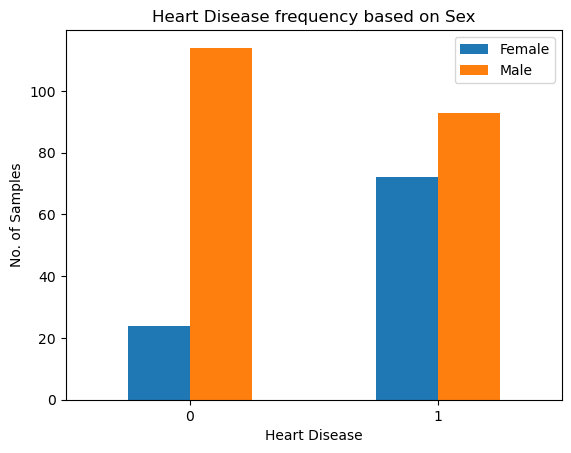

In [12]:
pd.crosstab(df["target"], df["sex"]).plot.bar(xlabel="Heart Disease", ylabel="No. of Samples")
plt.title("Heart Disease frequency based on Sex")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

**Age vs. max heart rate for Heart Disease**

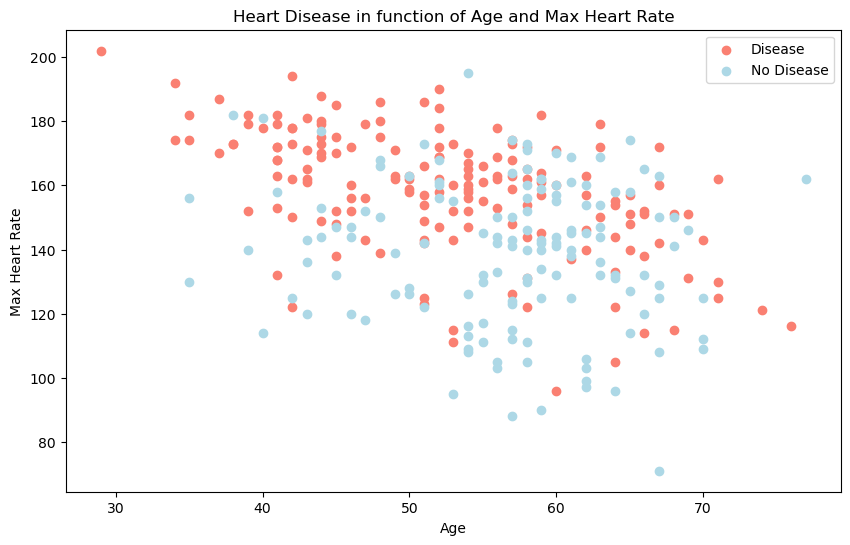

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

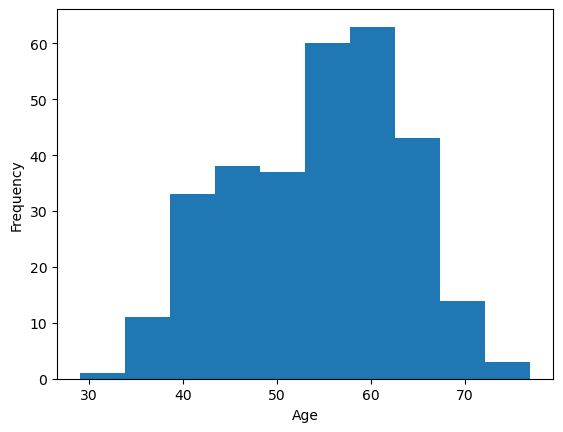

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()
plt.xlabel("Age");

**Heart Disease freq per chest pain type**

* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


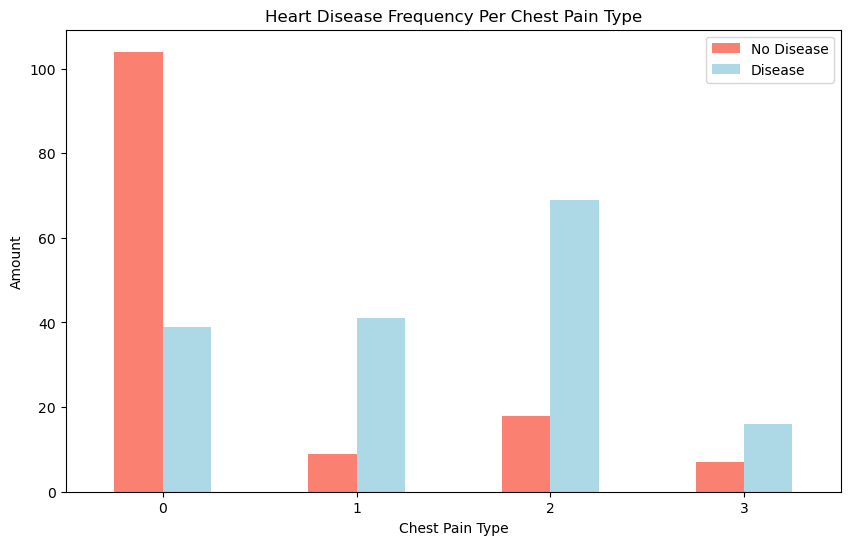

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


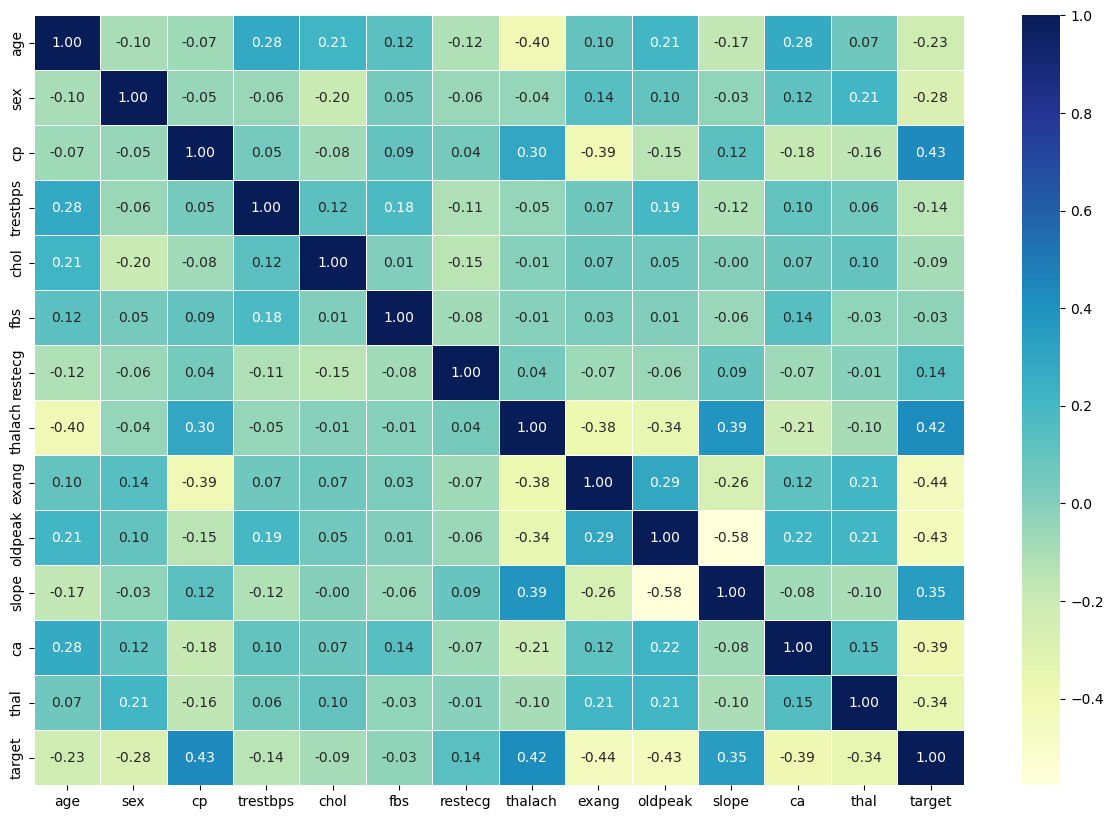

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [18]:
sns.__version__

'0.13.0'

## **5. Modelling**

In [15]:
X = df.drop("target", axis=1)
y = df["target"]

#train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**Now let's pick a model**

We'll try 3 models -->
1. Logistic Regression
2. KNN Classifier
3. RandomForest Classifier

In [16]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores_df = pd.DataFrame(model_scores, index=["Accuracy"])

C:\Users\krish\Documents\VS Code\ML-Proj-1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
scores_df

,Logistic Regression,KNN,Random Forest
Accuracy,0.770492,0.622951,0.786885


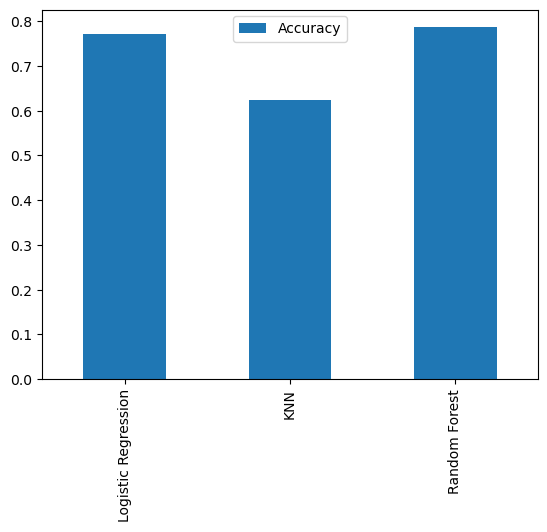

In [18]:
scores_df.T.plot.bar();

## **6.Experimentation**

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

**Hyperparameter Tuning (By Hand)**

In [22]:
#Let's try and tune the KNN model
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [24]:
#Let's tune the n_neighbours parameter
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [25]:
train_scores

[1.0,
 0.8140495867768595,
 0.7520661157024794,
 0.7479338842975206,
 0.78099173553719,
 0.7479338842975206,
 0.7520661157024794,
 0.7644628099173554,
 0.7272727272727273,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.6942148760330579,
 0.6900826446280992,
 0.7024793388429752,
 0.6942148760330579,
 0.6735537190082644,
 0.6818181818181818,
 0.6942148760330579,
 0.6983471074380165]

In [26]:
test_scores

[0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361]

Maximum KNN score on the test data: 72.13%


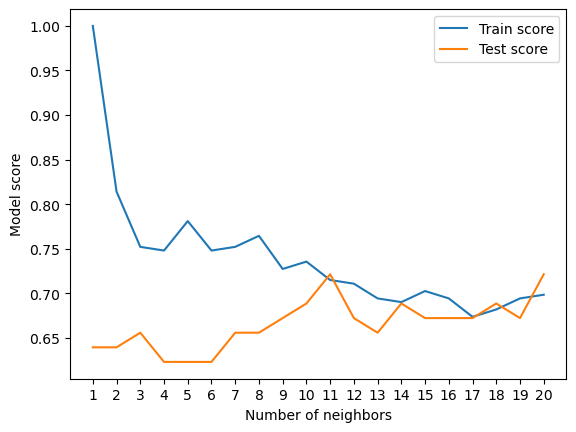

In [27]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [29]:
#We see that even the max KNN score of 72% is less than Logistic Regression's 77%, thus discard KNN

**Hyperparameter Tuning (By RandomizedSearchCV)**

Models to tune -->
* Logistic Regression
* RandomForest Classifier

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
# Tune LogisticRegression

np.random.seed(69)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [36]:
rs_log_reg.score(X_test, y_test)

0.7540983606557377

In [40]:
#Let's do the same for RandomForestClassifier

# Setup random seed
np.random.seed(69)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [48]:
rs_rf.score(X_test, y_test)

0.7868852459016393

We see that RandomForestClassifier is still the best out of all models, so let's proceed with it.

Let's try GridSearchCV to exhaustively find best parameters.

**Hyperparamter Tuning (By GridSearchCV)**

In [78]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 10),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                    param_grid=log_reg_grid,
                    cv=5,
                    verbose=2)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.000774263682681127, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.000774263682681127, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.000774263682681127, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.000774263682681127, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.000774263682681127, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.005994842503189409, solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [79]:
gs_log_reg.best_params_

{'C': 0.3593813663804626, 'solver': 'liblinear'}

In [80]:
gs_log_reg.score(X_test, y_test)

0.7704918032786885

In [84]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100, 150, 10),
           "max_depth": [None, 5, 6],
           "min_samples_split": np.arange(10, 12, 1),
           "min_samples_leaf": np.arange(9, 11, 1)}

# Setup grid hyperparameter search for GridSearchCV
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid,
                    cv=5,
                    verbose=2)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total time=   0.0s
[C

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 6],
                         'min_samples_leaf': array([ 9, 10]),
                         'min_samples_split': array([10, 11]),
                         'n_estimators': array([100, 110, 120, 130, 140])},
             verbose=2)

In [87]:
gs_rf.score(X_test, y_test)

0.7868852459016393

In [88]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 140}

**Evaluating our tuned classifier beyond accuracy**

* ROC Curve
* Confusion Matrix
* Classification Report
* Precision
* Reacll
* F1-Score

In [90]:
y_preds = gs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

**ROC Curve**

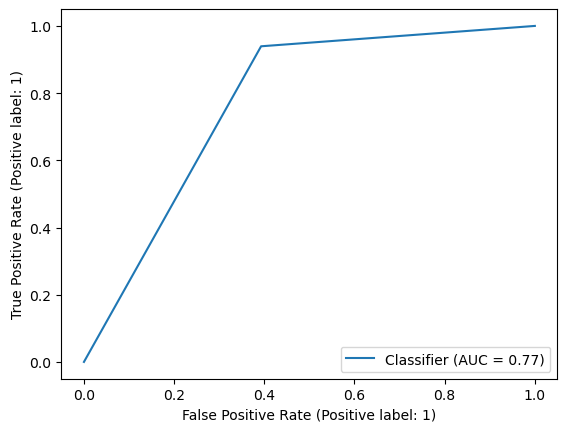

In [92]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

**Confusion Matrix**

In [93]:
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[17, 11],
       [ 2, 31]], dtype=int64)

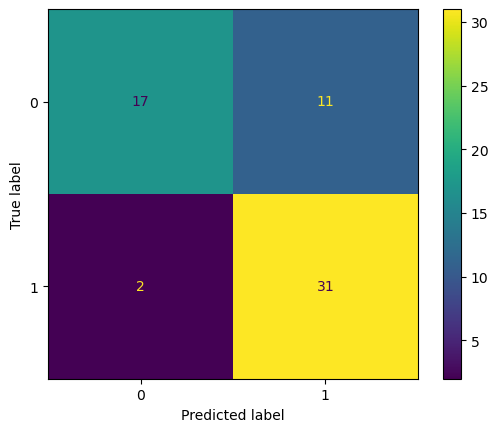

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

**Classification Report**

In [96]:
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



In [98]:
#It would be better if our classification report was done on cross-validated split of data
def cv_evaluate(model, X, y, cv=None, scoring_metric=None):
    score = cross_val_score(estimator=model, X=X, y=y, cv=cv, scoring=scoring_metric)
    score = score.mean()
    return score

In [102]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 140}

In [103]:
#Considering best model
model = RandomForestClassifier(max_depth=5,
                              min_samples_leaf=10,
                              min_samples_split=11,
                              n_estimators=140)

In [104]:
#Cross-val accuracy
acc = cv_evaluate(model, X, y, 5, "accuracy")
acc

0.8249726775956285

In [106]:
#Cross-val precision
precision = cv_evaluate(model, X, y, 5, "precision")
precision

0.8331691919191918

In [107]:
#Cross-val recall
recall = cv_evaluate(model, X, y, 5, "recall")
recall

0.8727272727272727

In [108]:
#Cross-val f1-score
f1 = cv_evaluate(model, X, y, 5, "f1")
f1

0.8404054593343444

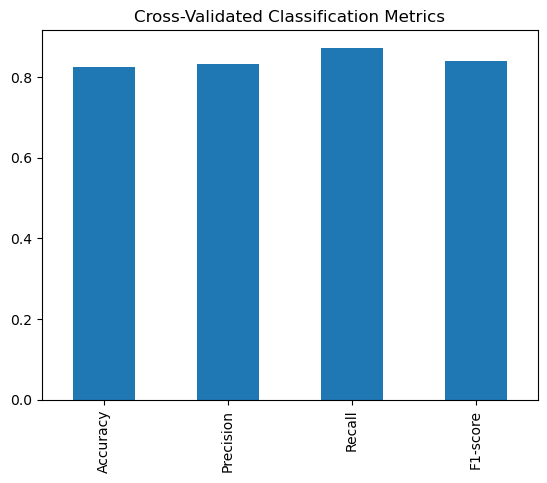

In [129]:
cross_validated_scores = {"Accuracy": acc,
                         "Precision": precision,
                         "Recall": recall,
                         "F1-score": f1}

cv_scores = pd.DataFrame(cross_validated_scores, index=[0])
cv_scores.T.plot.bar(title="Cross-Validated Classification Metrics", legend=None);

**Feature Importance**

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandomForestClassifier model...

In [134]:
model.fit(X_train, y_train)
importances = model.feature_importances_
importances

array([0.05409231, 0.02588429, 0.17759985, 0.02170392, 0.02458801,
       0.00023826, 0.00881652, 0.11844014, 0.09495205, 0.10072417,
       0.04131531, 0.13811826, 0.1935269 ])

In [136]:
model_importances = pd.Series(importances, index=df.drop("target", axis=1).columns)
model_importances

age         0.054092
sex         0.025884
cp          0.177600
trestbps    0.021704
chol        0.024588
fbs         0.000238
restecg     0.008817
thalach     0.118440
exang       0.094952
oldpeak     0.100724
slope       0.041315
ca          0.138118
thal        0.193527
dtype: float64

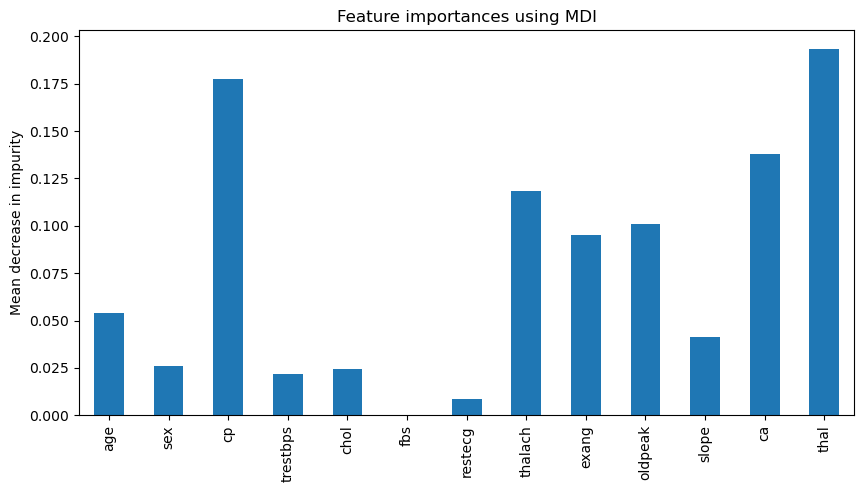

In [142]:
fig, ax = plt.subplots(figsize=[10,5])
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
model_importances.plot.bar(ax=ax);

In [145]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2)

model_importances = pd.Series(result.importances_mean, index=df.drop("target", axis=1).columns)
model_importances

age         0.008251
sex         0.005611
cp          0.046535
trestbps    0.003300
chol        0.006931
fbs         0.000000
restecg     0.001650
thalach     0.012541
exang       0.006601
oldpeak     0.013861
slope       0.012871
ca          0.038944
thal        0.047525
dtype: float64

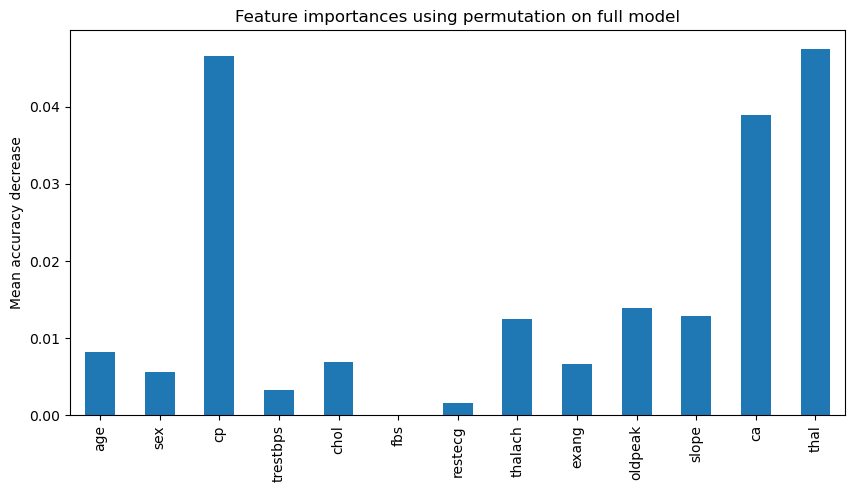

In [146]:
fig, ax = plt.subplots(figsize=[10,5])
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
model_importances.plot.bar(ax=ax);